# **Bioinformatics Project - Computational Drug Discovery [Part 5] Comparing Regressors**

In Part 5, we will be comparing several ML algorithms for build regression models of acetylcholinesterase inhibitors.



## **1. Import libraries**

In [1]:
! pip install lazypredict

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [3]:
! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2023-10-02 15:35:08--  https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv [following]
--2023-10-02 15:35:08--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8363909 (8.0M) [text/plain]
Saving to: ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_

In [4]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [5]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50 

## **3. Data pre-processing**

In [6]:
# Examine X dimension 
X.shape

(4695, 881)

In [7]:
# Remove low variance features because they are likely to be noise
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(4695, 137)

In [8]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [9]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 98%|█████████▊| 41/42 [01:00<00:01,  1.40s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003642 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 137
[LightGBM] [Info] Start training from score 5.814494


100%|██████████| 42/42 [01:00<00:00,  1.44s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 98%|█████████▊| 41/42 [00:52<00:01,  1.09s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 137
[LightGBM] [Info] Start training from score 5.814494


100%|██████████| 42/42 [00:53<00:00,  1.27s/it]


In [10]:
# Performance table of the training set (80% subset) - sorted by R2 
predictions_train

# Adjusted R-Squared (Adjusted R^2): This metric measures the goodness of fit of a regression model. It adjusts the regular R-squared value for the number of predictors (independent variables) in the model. It ranges from 0 to 1, where higher values indicate a better fit. A higher adjusted R-squared means that a larger proportion of the variance in the dependent variable is explained by the model. For example, a model with an adjusted R-squared of 0.46 means that 46% of the variance in the target variable is explained by the model.

# R-Squared (R^2): Similar to adjusted R-squared, R-squared measures the goodness of fit of a regression model. It also ranges from 0 to 1, where higher values indicate a better fit. However, R-squared does not account for the number of predictors in the model, so it can be artificially inflated by adding more predictors. Like adjusted R-squared, it measures the proportion of variance in the dependent variable explained by the model.

# RMSE (Root Mean Squared Error): RMSE is a measure of the prediction error of a regression model. It calculates the square root of the average of the squared differences between the actual target values and the predicted values. Lower RMSE values indicate better model accuracy. For example, a model with an RMSE of 1.06 means that, on average, its predictions are off by approximately 1.06 units from the actual values.

# Time Taken: This column represents the time taken (presumably in some time unit, such as seconds) to train or evaluate each model. It indicates the computational cost or efficiency of each model. Lower values here are generally better, as they indicate shorter training or evaluation times.

# In summary

# Adjusted R-Squared and R-Squared: Indicate how well the model fits the data and explains the variance in the target variable.

# RMSE: Measures the accuracy of the model's predictions. Lower RMSE is better.

# Time Taken: Reflects the computational cost or efficiency of the model.


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.86,0.86,0.57,0.16
ExtraTreeRegressor,0.86,0.86,0.57,0.15
ExtraTreesRegressor,0.86,0.86,0.57,6.36
GaussianProcessRegressor,0.86,0.86,0.57,7.31
RandomForestRegressor,0.82,0.83,0.64,4.68
XGBRegressor,0.82,0.83,0.65,2.15
BaggingRegressor,0.80,0.81,0.67,0.82
MLPRegressor,0.76,0.77,0.75,8.47
HistGradientBoostingRegressor,0.67,0.69,0.87,1.33


In [11]:
# Performance table of the test set (20% subset) - sorted by R2
predictions_test 

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.46,0.54,1.06,1.28
RandomForestRegressor,0.44,0.52,1.08,5.35
LGBMRegressor,0.44,0.52,1.08,0.36
XGBRegressor,0.43,0.51,1.09,2.13
BaggingRegressor,0.41,0.49,1.11,0.50
NuSVR,0.39,0.48,1.12,1.65
SVR,0.39,0.48,1.12,2.04
KNeighborsRegressor,0.37,0.46,1.14,0.12
MLPRegressor,0.36,0.45,1.15,7.91


## **5. Data visualization of model performance**

[(0.0, 1.0)]

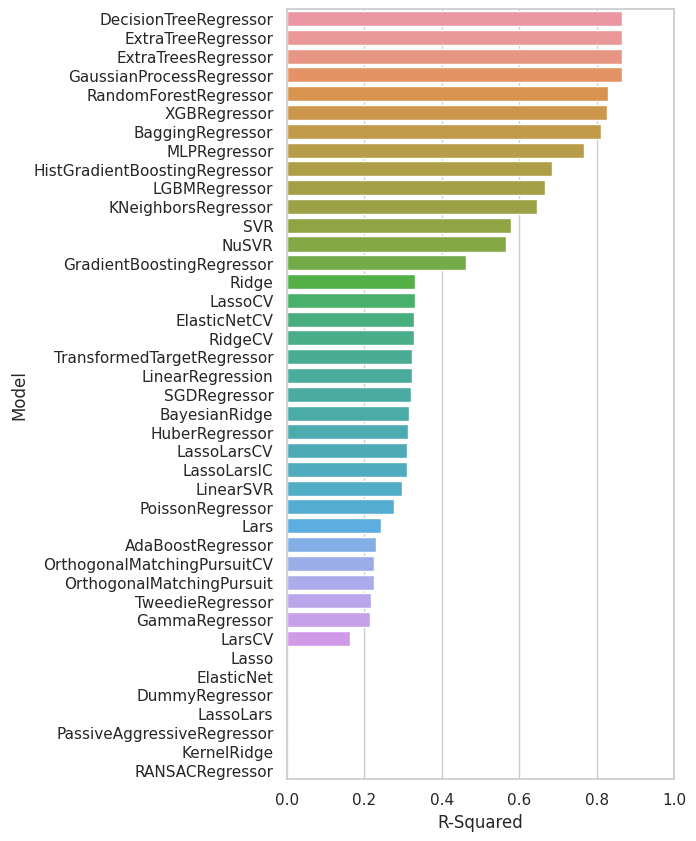

In [12]:
# Bar plot of R-squared values of the test set 
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

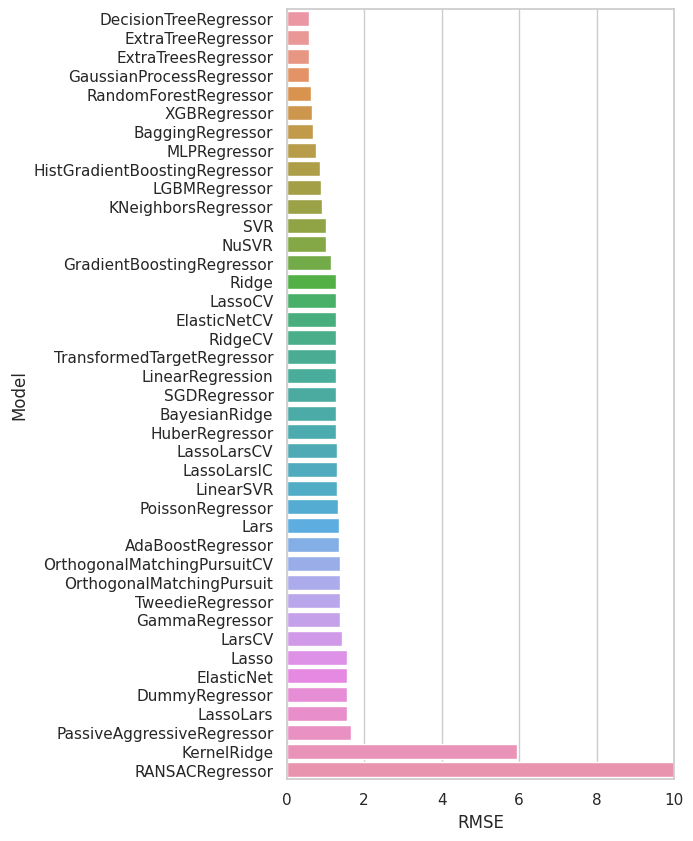

In [13]:
# Bar plot of RMSE values of the test set
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

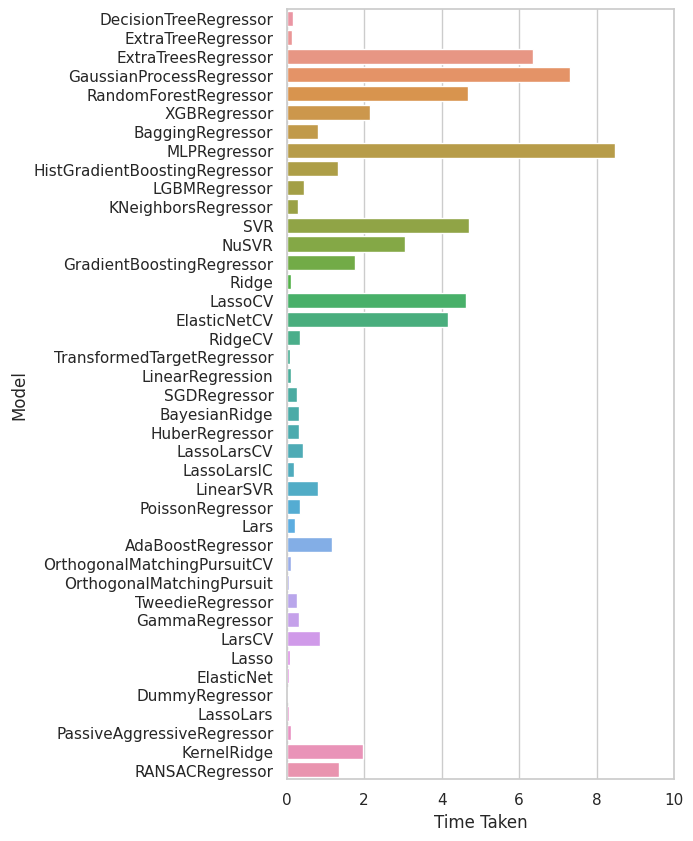

In [14]:
# Bar plot of calculation time of the test set
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))